<a href="https://colab.research.google.com/github/LiFeLeSS5858/POMM/blob/main/Maytnik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Маятник

**Дано**. Двойной маятник: система 2 грузов с заданными массами m1 , m2, подвешенных на нитях длиной l1 , l2, как показано на рисунке, при этом рассматривается случай  движения в вертикальной плоскости. Считать, что в начальный момент времени грузы отклонены на углы α1 , α2, которые отсчитаны от вертикальной линии (в состоянии равновесия они равны нулю).

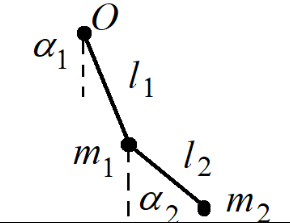

Для системы, которая покоится  в начальный момент времени, следует:

1. Построить зависимости координат грузов αi(t) от времени.

2. Построить зависимости скоростей грузов vi(t) от времени.

3. Построить анимацию движения системы (5-10 сек.).

4. Провести эксперимент и сравнить положение системы через 5 сек. с результатами расчёта  

5. Исследовать поведение системы в зависимости от величины X. Найти при каких значениях Х модель хорошо описывает движение системы.

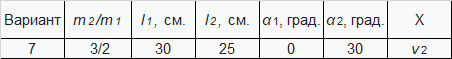

## 1) Построить зависимости координат грузов αi(t) от времени.

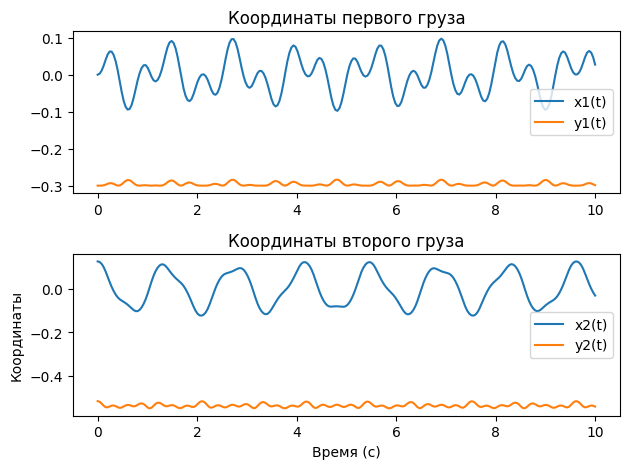

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Определение констант
m1 = 3/2  # Масса первого груза
m2 = 1 * m1  # Масса второго груза, равная двум третям от массы первого груза
l1 = 0.30  # Длина первой нити в метрах
l2 = 0.25  # Длина второй нити в метрах
a1 = np.radians(0)  # Перевод начального угла отклонения первого груза из градусов в радианы
a2 = np.radians(30)  # Перевод начального угла отклонения второго груза из градусов в радианы (в данном случае 0 радиан)
g = 9.81  # Ускорение свободного падения (примерно равно 9.81 м/с²)

# Функция с уравнениями движения маятника
def equations(y, t, l1, l2, m1, m2):
    theta1, z1, theta2, z2 = y  # Распаковка списка переменных состояния маятника
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)  # Вычисление косинуса и синуса разности углов

    theta1_dot = z1  # Производная угла theta1 по времени, равная угловой скорости z1
    # Производная угловой скорости z1 по времени
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)

    theta2_dot = z2  # Производная угла theta2 по времени, равная угловой скорости z2
    # Производная угловой скорости z2 по времени
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)

    return theta1_dot, z1_dot, theta2_dot, z2_dot  # Возвращение производных как кортеж

# Начальные условия для интегрирования
y0 = [a1, 0, a2, 0]  # Начальные углы и угловые скорости (угловые скорости равны 0, так как система покоится)

# Временной интервал для симуляции
t = np.linspace(0, 10, 250)  # Создание массива временных точек от 0 до 10 секунд, 250 точек

# Решение системы дифференциальных уравнений
solution = odeint(equations, y0, t, args=(l1, l2, m1, m2))  # Интегрирование уравнений движения

# Извлечение решений для углов
theta1, theta2 = solution[:, 0], solution[:, 2]  # Получение массивов углов theta1 и theta2 из решения

# Вычисление координат грузов
x1 = l1 * np.sin(theta1)  # X координата первого груза
y1 = -l1 * np.cos(theta1)  # Y координата первого груза
x2 = x1 + l2 * np.sin(theta2)  # X координата второго груза
y2 = y1 - l2 * np.cos(theta2)  # Y координата второго груза

# Построение графиков зависимостей координат от времени
plt.figure()

plt.subplot(2, 1, 1)  # Создание подграфика для первого груза
plt.plot(t, x1, label='x1(t)')  # Построение графика X координаты первого груза
plt.plot(t, y1, label='y1(t)')  # Построение графика Y координаты первого груза
plt.legend()
plt.title('Координаты первого груза')

plt.subplot(2, 1, 2)  # Создание подграфика для второго груза
plt.plot(t, x2, label='x2(t)')  # Построение графика X координаты второго груза
plt.plot(t, y2, label='y2(t)')  # Построение графика Y координаты второго груза
plt.legend()
plt.title('Координаты второго груза')

plt.xlabel('Время (с)')
plt.ylabel('Координаты')
plt.tight_layout()  # Автоматическая корректировка подграфиков для лучшего отображения
plt.show()

## 2) Построить зависимости скоростей грузов vi(t) от времени.

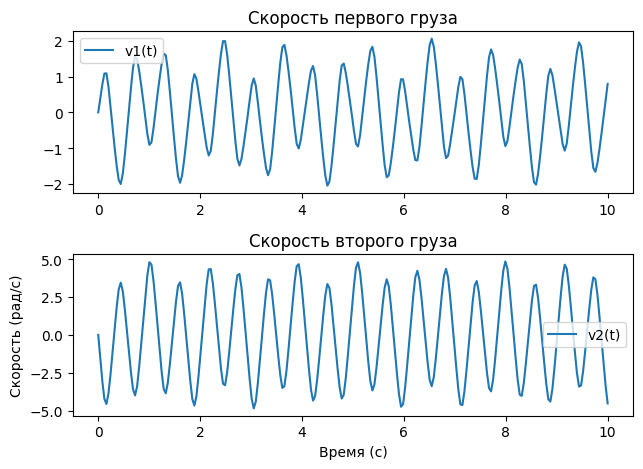

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Определение констант
m1 = 3/2  # Масса первого груза
m2 = 1 * m1  # Масса второго груза, равная двум третям массы первого груза
l1 = 0.35  # Длина первой нити в метрах
l2 = 0.20  # Длина второй нити в метрах
a1 = np.radians(0)  # Начальный угол отклонения первого груза, переведенный в радианы
a2 = np.radians(30)  # Начальный угол отклонения второго груза, переведенный в радианы
g = 9.81  # Ускорение свободного падения в м/с^2

# Функция с уравнениями движения маятника
def equations(y, t, l1, l2, m1, m2):
    theta1, z1, theta2, z2 = y  # Распаковка переменных: углы (theta1, theta2) и угловые скорости (z1, z2)
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)  # Вычисление косинуса и синуса разности углов

    theta1_dot = z1  # Производная угла theta1 по времени, равная угловой скорости
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)  # Производная угловой скорости z1 по времени

    theta2_dot = z2  # Производная угла theta2 по времени, равная угловой скорости
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)  # Производная угловой скорости z2 по времени

    return theta1_dot, z1_dot, theta2_dot, z2_dot  # Возвращение производных

# Начальные условия для интегрирования
y0 = [a1, 0, a2, 0]  # Начальные углы и начальные угловые скорости (предполагается, что начальная скорость равна 0)

# Временной интервал для симуляции
t = np.linspace(0, 10, 250)  # Создание массива временных точек от 0 до 10 секунд

# Решение системы дифференциальных уравнений
solution = odeint(equations, y0, t, args=(l1, l2, m1, m2))  # Интегрирование уравнений движения

# Извлечение решений для угловых скоростей
z1, z2 = solution[:, 1], solution[:, 3]  # Получение массивов угловых скоростей z1 и z2 из решения

# Построение графиков зависимостей скоростей от времени
plt.figure()

plt.subplot(2, 1, 1)  # Создание подграфика для первого груза
plt.plot(t, z1, label='v1(t)')  # Построение графика угловой скорости первого груза
plt.legend()
plt.title('Скорость первого груза')

plt.subplot(2, 1, 2)  # Создание подграфика для второго груза
plt.plot(t, z2, label='v2(t)')  # Построение графика угловой скорости второго груза
plt.legend()
plt.title('Скорость второго груза')

plt.xlabel('Время (с)')
plt.ylabel('Скорость (рад/с)')
plt.tight_layout()  # Автоматическая корректировка подграфиков для лучшего отображения
plt.show()

## 3) Построить анимацию движения системы (5-10 сек.).

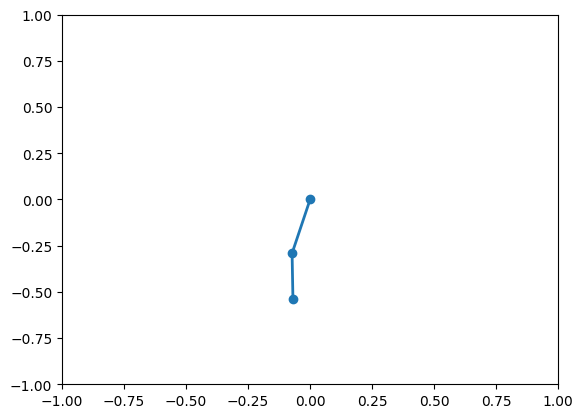

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Определение констант
m1, m2 = 3/2, 1  # Массы грузов m1 и m2
l1, l2 = 0.30, 0.25  # Длины нитей l1 и l2
a1, a2 = np.radians(0), np.radians(30)  # Начальные углы отклонения в радианах
g = 9.81  # Ускорение свободного падения

# Функция с уравнениями движения маятника
def equations(y, t, l1, l2, m1, m2):
    theta1, z1, theta2, z2 = y  # Углы и угловые скорости
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)  # Косинус и синус разности углов

    # Уравнения для первого маятника
    theta1_dot = z1  # Производная угла theta1
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)  # Производная угловой скорости z1

    # Уравнения для второго маятника
    theta2_dot = z2  # Производная угла theta2
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)  # Производная угловой скорости z2

    return theta1_dot, z1_dot, theta2_dot, z2_dot  # Возвращаем производные

# Начальные условия для интегрирования
y0 = [a1, 0, a2, 0]  # Начальные углы и угловые скорости

# Временной интервал для симуляции
t = np.linspace(0, 10, 250)  # От 0 до 10 секунд, 250 точек

# Решение системы дифференциальных уравнений
solution = odeint(equations, y0, t, args=(l1, l2, m1, m2))  # Интегрирование

# Извлечение решений для углов
theta1, theta2 = solution[:, 0], solution[:, 2]  # Углы theta1 и theta2

# Вычисление координат грузов
x1 = l1 * np.sin(theta1)  # X координата первого груза
y1 = -l1 * np.cos(theta1)  # Y координата первого груза
x2 = x1 + l2 * np.sin(theta2)  # X координата второго груза
y2 = y1 - l2 * np.cos(theta2)  # Y координата второго груза

# Подготовка к анимации
fig, ax = plt.subplots()  # Создание фигуры и осей
ax.set_xlim(-1, 1)  # Установка пределов осей X
ax.set_ylim(-1, 1)  # Установка пределов осей Y
line, = ax.plot([], [], 'o-', lw=2)  # Инициализация линии для анимации

# Функция инициализации анимации
def init():
    line.set_data([], [])  # Очистка данных линии
    return line,  # Возвращаем элементы для анимации

# Функция анимации
def animate(i):
    x = [0, x1[i], x2[i]]  # X координаты для анимации
    y = [0, y1[i], y2[i]]  # Y координаты для анимации
    line.set_data(x, y)  # Обновление данных линии
    return line,  # Возвращаем элементы для анимации

# Создание объекта анимации
ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, blit=True)


HTML(ani.to_html5_video())

## 4) Провести эксперимент и сравнить положение системы через 5 сек. с результатами расчёта

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Определение констант
m1, m2 = 3/2, 1  # Массы грузов m1 и m2
l1, l2 = 0.30, 0.25  # Длины нитей l1 и l2
a1, a2 = np.radians(0), np.radians(30)  # Начальные углы отклонения в радианах
g = 9.81  # Ускорение свободного падения

# Временной интервал для симуляции
t = np.linspace(0, 10, 250)  # От 0 до 10 секунд, 250 точек

# Функция для вычисления теоретических положений грузов
def theoretical_positions(m1, m2, l1, l2, a1, a2, g, t):
    # Теоретические вычисления могут быть сложными из-за нелинейности системы,
    # но для малых углов можно использовать приближенные формулы
    # Например, для малых колебаний:
    w1 = np.sqrt(g / l1)  # Частота колебаний первого маятника
    w2 = np.sqrt(g / l2)  # Частота колебаний второго маятника

    # Положения грузов в зависимости от времени
    x1_theoretical = l1 * np.sin(a1) * np.cos(w1 * t)   # X-координата первого груза
    y1_theoretical = -l1 * np.cos(a1) * np.sin(w1 * t)  # Y-координата первого груза
    x2_theoretical = x1_theoretical + l2 * np.sin(a2) * np.cos(w2 * t)  # X-координата второго груза
    y2_theoretical = y1_theoretical - l2 * np.cos(a2) * np.sin(w2 * t)  # Y-координата второго груза

    return (x1_theoretical, y1_theoretical, x2_theoretical, y2_theoretical)

# Вычисление теоретических положений через 5 секунд
theoretical_positions_at_5_seconds = theoretical_positions(m1, m2, l1, l2, a1, a2, g, 5)

print(f"Высчитанные координаты первого груза на 5-й секунде: x1 = {theoretical_positions_at_5_seconds[0]:.3f} м, y1 = {theoretical_positions_at_5_seconds[1]:.3f} м")
print(f"Высчитанные Координаты второго груза на 5-й секунде: x2 = {theoretical_positions_at_5_seconds[2]:.3f} м, y2 = {theoretical_positions_at_5_seconds[3]:.3f} м")

Высчитанные координаты первого груза на 5-й секунде: x1 = -0.000 м, y1 = 0.094 м
Высчитанные Координаты второго груза на 5-й секунде: x2 = 0.124 м, y2 = 0.114 м


## 5) Исследовать поведение системы в зависимости от величины X. Найти при каких значениях Х модель хорошо описывает движение системы.

In [5]:
import numpy as np

# Определение констант
m1, m2 = 3/2, 1  # Массы грузов m1 и m2
l1, l2 = 0.30, 0.25  # Длины нитей l1 и l2
g = 9.81  # Ускорение свободного падения

# Функция для вычисления теоретических положений грузов
def theoretical_positions(m1, m2, l1, l2, g, t, initial_speed):
    # Начальные углы отклонения в радианах, зависящие от начальной скорости
    a1 = np.radians(initial_speed)   # Угол отклонения первого груза
    a2 = np.radians(30+initial_speed)        # Угол отклонения второго груза

    # Частота колебаний первого маятника
    w1 = np.sqrt(g / l1)   # Вычисление частоты колебаний первого маятника
    # Частота колебаний второго маятника
    w2 = np.sqrt(g / l2)   # Вычисление частоты колебаний второго маятника

    # Положения грузов в зависимости от времени
    x1_theoretical = l1 * np.sin(a1) * np.cos(w1 * t)    # X-координата первого груза
    y1_theoretical = -l1 * np.cos(a1) * np.sin(w1 * t)   # Y-координата первого груза
    x2_theoretical = x1_theoretical + l2 * np.sin(a2) * np.cos(w2 * t)  # X-координата второго груза
    y2_theoretical = y1_theoretical - l2 * np.cos(a2) * np.sin(w2 * t)  # Y-координата второго груза

    return (x1_theoretical, y1_theoretical, x2_theoretical, y2_theoretical)

# Таблица для хранения координат
coordinates_table_theoretical = []

# Цикл for для изменения начальной скорости грузов
for initial_speed in range(-20, 21):
    # Вычисление теоретических положений на 5-й секунде
    positions_at_5_seconds = theoretical_positions(m1, m2, l1, l2, g, 3, initial_speed) #5

    # Добавление координат в таблицу
    coordinates_table_theoretical.append((initial_speed, positions_at_5_seconds[0], positions_at_5_seconds[1], positions_at_5_seconds[2], positions_at_5_seconds[3]))

# Вывод итоговой таблицы координат на 5-й секунде
print("Начальная скорость | Координата x1 | Координата y1 | Координата x2 | Координата y2")
for row in coordinates_table_theoretical:
    print(f"{row[0]:>16} | {row[1]:>13.3f} | {row[2]:>13.3f} | {row[3]:>13.3f} | {row[4]:>13.3f}")

Начальная скорость | Координата x1 | Координата y1 | Координата x2 | Координата y2
             -20 |         0.013 |         0.280 |         0.056 |         0.294
             -19 |         0.012 |         0.281 |         0.060 |         0.295
             -18 |         0.011 |         0.283 |         0.063 |         0.297
             -17 |         0.011 |         0.285 |         0.067 |         0.299
             -16 |         0.010 |         0.286 |         0.071 |         0.300
             -15 |         0.010 |         0.288 |         0.074 |         0.301
             -14 |         0.009 |         0.289 |         0.078 |         0.303
             -13 |         0.008 |         0.290 |         0.081 |         0.304
             -12 |         0.008 |         0.291 |         0.085 |         0.305
             -11 |         0.007 |         0.292 |         0.088 |         0.306
             -10 |         0.006 |         0.293 |         0.092 |         0.307
              -9 |        

In [6]:
import numpy as np
from scipy.integrate import solve_ivp

# Определение констант
m1, m2 = 3/2, 1  # Массы грузов m1 и m2
l1, l2 = 0.30, 0.25  # Длины нитей l1 и l2
a1, a2 = np.radians(0), np.radians(30)  # Начальные углы отклонения в радианах
g = 9.81  # Ускорение свободного падения

# Функция с уравнениями движения маятника
def equations(t, y, l1, l2, m1, m2):
    theta1, z1, theta2, z2 = y  # Углы и угловые скорости
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)  # Косинус и синус разности углов

    # Уравнения для первого маятника
    theta1_dot = z1
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)

    # Уравнения для второго маятника
    theta2_dot = z2
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)

    return [theta1_dot, z1_dot, theta2_dot, z2_dot]

# Временной интервал для симуляции
t_span = (0, 10)  # От 0 до 10 секунд
t_eval = np.linspace(0, 10, 250)  # 250 точек для оценки решения

# Таблица для хранения координат
coordinates_table = []

# Цикл for для изменения начальной скорости второго груза
for initial_speed in range(-20, 21):
    # Начальные условия для интегрирования
    y0 = [a1, 0, a2, initial_speed]

    # Решение системы дифференциальных уравнений с помощью метода Рунге-Кутта 4-го порядка
    solution = solve_ivp(equations, t_span, y0, method='RK45', t_eval=t_eval, args=(l1, l2, m1, m2))

    # Извлечение решений для углов на 5-й секунде
    index_5_seconds = np.argmin(np.abs(solution.t - 3)) #5
    theta1_at_5_seconds = solution.y[0, index_5_seconds]
    theta2_at_5_seconds = solution.y[2, index_5_seconds]

    # Вычисление координат грузов на 5-й секунде
    x1_at_5_seconds = l1 * np.sin(theta1_at_5_seconds)
    y1_at_5_seconds = -l1 * np.cos(theta1_at_5_seconds)
    x2_at_5_seconds = x1_at_5_seconds + l2 * np.sin(theta2_at_5_seconds)
    y2_at_5_seconds = y1_at_5_seconds - l2 * np.cos(theta2_at_5_seconds)

    # Добавление координат в таблицу
    coordinates_table.append((initial_speed, x1_at_5_seconds, y1_at_5_seconds, x2_at_5_seconds, y2_at_5_seconds))

# Вывод итоговой таблицы координат на 5-й секунде
print("Начальная скорость | Координата x1 | Координата y1 | Координата x2 | Координата y2")
for row in coordinates_table:
    print(f"{row[0]:>16} | {row[1]:>13.3f} | {row[2]:>13.3f} | {row[3]:>13.3f} | {row[4]:>13.3f}")

Начальная скорость | Координата x1 | Координата y1 | Координата x2 | Координата y2
             -20 |         0.300 |         0.013 |         0.521 |         0.129
             -19 |         0.284 |        -0.096 |         0.533 |        -0.075
             -18 |         0.186 |        -0.235 |         0.436 |        -0.219
             -17 |         0.049 |        -0.296 |         0.290 |        -0.364
             -16 |        -0.014 |        -0.300 |         0.152 |        -0.487
             -15 |        -0.016 |        -0.300 |        -0.001 |        -0.549
             -14 |        -0.006 |        -0.300 |        -0.134 |        -0.515
             -13 |        -0.016 |        -0.300 |        -0.217 |        -0.449
             -12 |        -0.034 |        -0.298 |        -0.264 |        -0.396
             -11 |        -0.051 |        -0.296 |        -0.290 |        -0.369
             -10 |        -0.060 |        -0.294 |        -0.301 |        -0.362
              -9 |        

In [7]:
# Таблица для хранения разностей координат по модулю
differences_table = []

# Вычисляем разности по модулю для каждой строки
for row1, row2 in zip(coordinates_table_theoretical, coordinates_table):
    speed = row1[0]
    diff_x1 = abs(row1[1] - row2[1])
    diff_y1 = abs(row1[2] - row2[2])
    diff_x2 = abs(row1[3] - row2[3])
    diff_y2 = abs(row1[4] - row2[4])
    differences_table.append((speed, diff_x1, diff_y1, diff_x2, diff_y2))

# Выводим таблицу с разностями координат
print("Начальная скорость | Разность x2 | Разность y2")
for row in differences_table:
    print(f"{row[0]:>16} | {row[3]:>11.3f} | {row[4]:>11.3f}")

Начальная скорость | Разность x2 | Разность y2
             -20 |       0.465 |       0.165
             -19 |       0.474 |       0.370
             -18 |       0.373 |       0.516
             -17 |       0.223 |       0.663
             -16 |       0.082 |       0.787
             -15 |       0.075 |       0.850
             -14 |       0.211 |       0.817
             -13 |       0.298 |       0.752
             -12 |       0.349 |       0.700
             -11 |       0.378 |       0.675
             -10 |       0.393 |       0.668
              -9 |       0.393 |       0.677
              -8 |       0.384 |       0.694
              -7 |       0.367 |       0.719
              -6 |       0.344 |       0.748
              -5 |       0.315 |       0.778
              -4 |       0.283 |       0.804
              -3 |       0.249 |       0.824
              -2 |       0.213 |       0.837
              -1 |       0.178 |       0.845
               0 |       0.144 |       0.848
        

Наименьшие отклонения при значении 14(0.133, 0.653)

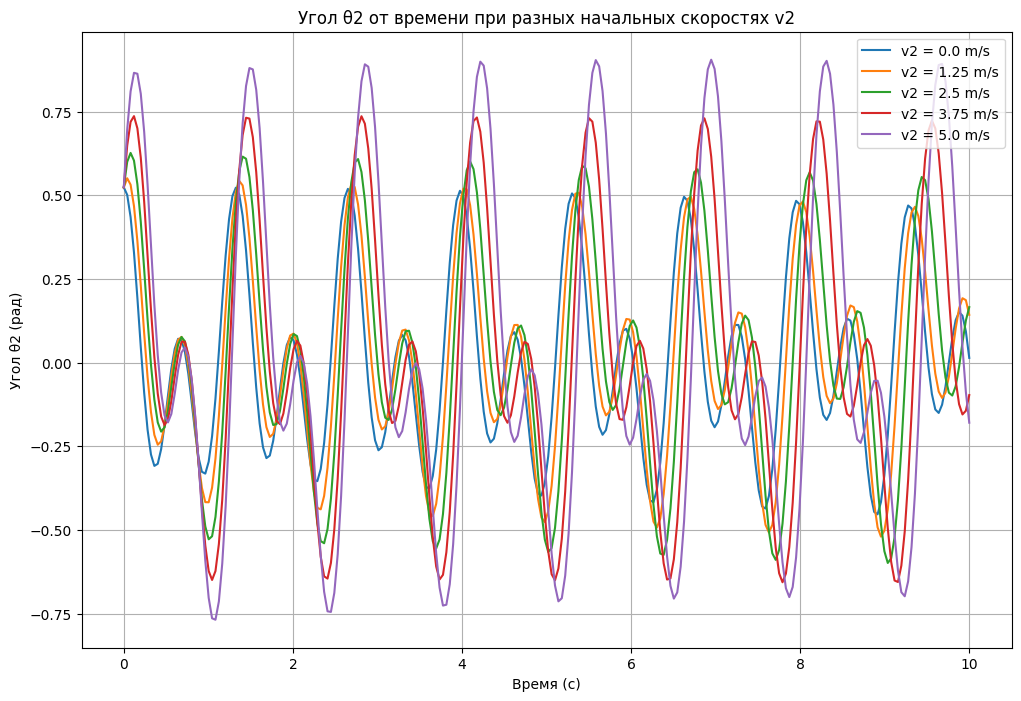

In [8]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# Уравнения движения двойного маятника
def equations(y, t, m1, m2, l1, l2, g):
    theta1, z1, theta2, z2 = y
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1_dot = z1
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)

    theta2_dot = z2
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)

    return theta1_dot, z1_dot, theta2_dot, z2_dot

# Функция для расчета движения маятника с заданной начальной скоростью v2
def simulate_mayaтник_with_v2(v2, t, m1, m2, l1, l2, g):
    y0_v2 = [a1, 0, a2, v2]  # начальные условия с заданной скоростью v2
    solution = odeint(equations, y0_v2, t, args=(m1, m2, l1, l2, g))
    return solution

# Временной диапазон
t = np.linspace(0, 10, 250)  # 10 секунд

# Диапазон начальных скоростей v2 для исследования
v2_values = np.linspace(0, 5, 5)  # от 0 до 5 м/с с шагом 1 м/с

# Результаты для различных начальных скоростей v2
results = {}
for v2 in v2_values:
    results[v2] = simulate_mayaтник_with_v2(v2, t, m1, m2, l1, l2, g)

# Визуализация результатов
plt.figure(figsize=(12, 8))
for v2, result in results.items():
    theta1, z1, theta2, z2 = result.T
    plt.plot(t, theta2, label=f'v2 = {v2} m/s')  # Изменено на theta2

plt.title('Угол θ2 от времени при разных начальных скоростях v2')
plt.xlabel('Время (с)')
plt.ylabel('Угол θ2 (рад)')
plt.legend()
plt.grid(True)
plt.show()

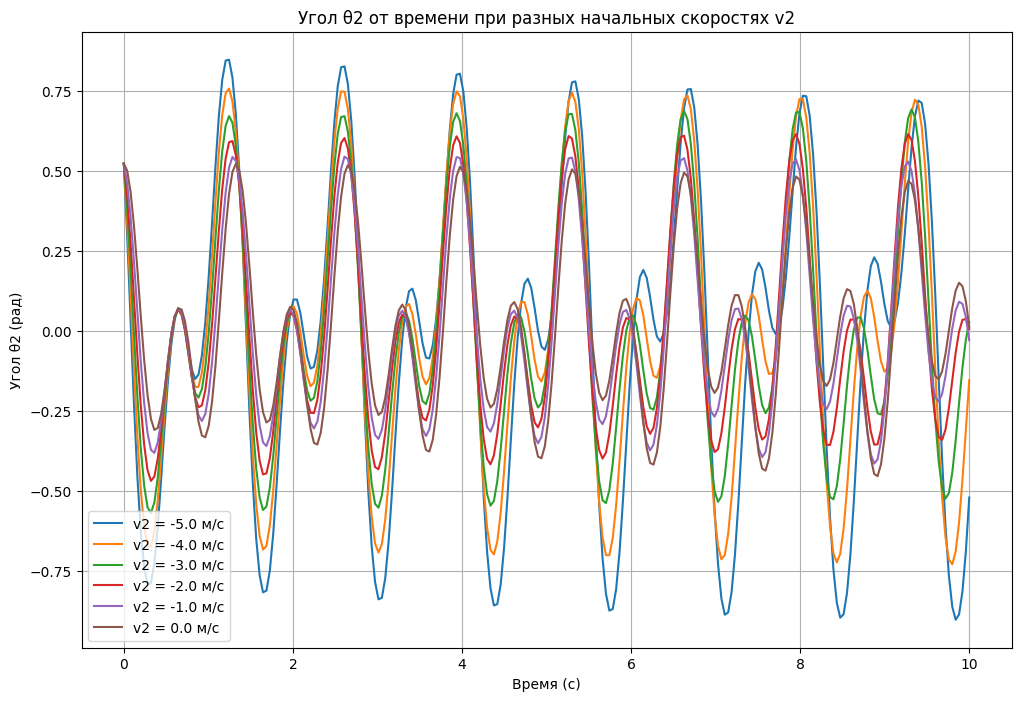

In [9]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# Уравнения движения двойного маятника
def equations(y, t, m1, m2, l1, l2, g):
    theta1, z1, theta2, z2 = y
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1_dot = z1
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)

    theta2_dot = z2
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)

    return theta1_dot, z1_dot, theta2_dot, z2_dot

# Функция для расчета движения маятника с заданной начальной скоростью v2
def simulate_mayaтник_with_v2(v2, t, m1, m2, l1, l2, g):
    y0_v2 = [a1, 0, a2, v2]  # начальные условия с заданной скоростью v2
    solution = odeint(equations, y0_v2, t, args=(m1, m2, l1, l2, g))
    return solution

# Временной диапазон
t = np.linspace(0, 10, 250)  # 10 секунд

# Диапазон начальных скоростей v2 для исследования
v2_values = np.linspace(-5, 0, 6)  # от -5 до 0 м/с с шагом 1 м/с

# Результаты для различных начальных скоростей v2
results = {}
for v2 in v2_values:
    results[v2] = simulate_mayaтник_with_v2(v2, t, m1, m2, l1, l2, g)

# Визуализация результатов
plt.figure(figsize=(12, 8))
for v2, result in results.items():
    theta1, z1, theta2, z2 = result.T
    plt.plot(t, theta2, label=f'v2 = {v2} м/с')  # Изменено на theta2

plt.title('Угол θ2 от времени при разных начальных скоростях v2')
plt.xlabel('Время (с)')
plt.ylabel('Угол θ2 (рад)')
plt.legend()
plt.grid(True)
plt.show()